In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


` Loading Dataset `


In [365]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [366]:
df.shape

(7043, 21)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


` Adding sim providers `

In [368]:
# Add SIM Provider (as per requirements)
np.random.seed(42)
providers = ['Jio', 'Airtel', 'BSNL', 'Vi']
# Corrected probabilities to sum to 1
df['SIMProvider'] = np.random.choice(providers, size=len(df), p=[0.263, 0.248, 0.245, 0.244])

# Create tenure bins
bins = [0, 12, 24, 36, 48, 60, 72]
labels_tenure = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels_tenure, include_lowest=True)

# Create tenure quarters
df['TenureQuarter'] = (df['tenure'] // 3) + 1

` Funtion for bar charts`

In [369]:
def create_bar_chart(data, title, xlabel, ylabel, filename, colors=None):
    """Simple bar chart creator"""
    plt.figure(figsize=(10, 6))
    if colors is None:
        bars = plt.bar(range(len(data)), data.values, edgecolor='black', linewidth=1.5, alpha=0.8)
    else:
        bars = plt.bar(range(len(data)), data.values, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.xticks(range(len(data)), data.index, rotation=45 if len(data) > 5 else 0)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({height/data.sum()*100:.1f}%)',
                ha='center', va='bottom', fontsize=10 if len(data) > 5 else 11, fontweight='bold')

    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

` Funtion for Grouped_bar charts`

In [370]:
def create_grouped_bar_chart(crosstab_data, title, xlabel, ylabel, filename, legend_labels=None, colors=None):
    """Simple grouped bar chart creator with values and percentages"""
    plt.figure(figsize=(12, 6))
    x = np.arange(len(crosstab_data.index))
    n_cols = len(crosstab_data.columns)
    width = 0.8 / n_cols

    if colors is None:
        colors = ['red', 'blue', 'yellow', 'green', 'skyblue']
    else:
        bars = plt.bar(range(len(crosstab_data)), crosstab_data.values, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

    row_totals = crosstab_data.sum(axis=1)

    for i, col in enumerate(crosstab_data.columns):
        offset = width * i - (width * n_cols / 2) + width / 2
        bars = plt.bar(x + offset, crosstab_data[col], width,
                       label=legend_labels[i] if legend_labels else col,
                       color=colors[i % len(colors)], edgecolor='black',
                       linewidth=1.5, alpha=0.8)

        # Add labels (value + percentage)
        for bar, total in zip(bars, row_totals):
            height = bar.get_height()
            percent = (height / total * 100) if total > 0 else 0
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{int(height):,}\n({percent:.1f}%)',
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Chart styling
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.xticks(x, crosstab_data.index, rotation=45 if len(crosstab_data) > 5 else 0)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


` Gender-wise Customer Distribution`


 • Male: 3,555 (50.5%) | Female: 3,488 (49.5%)
 BUSINESS: Nearly equal distribution - no gender bias in service adoption


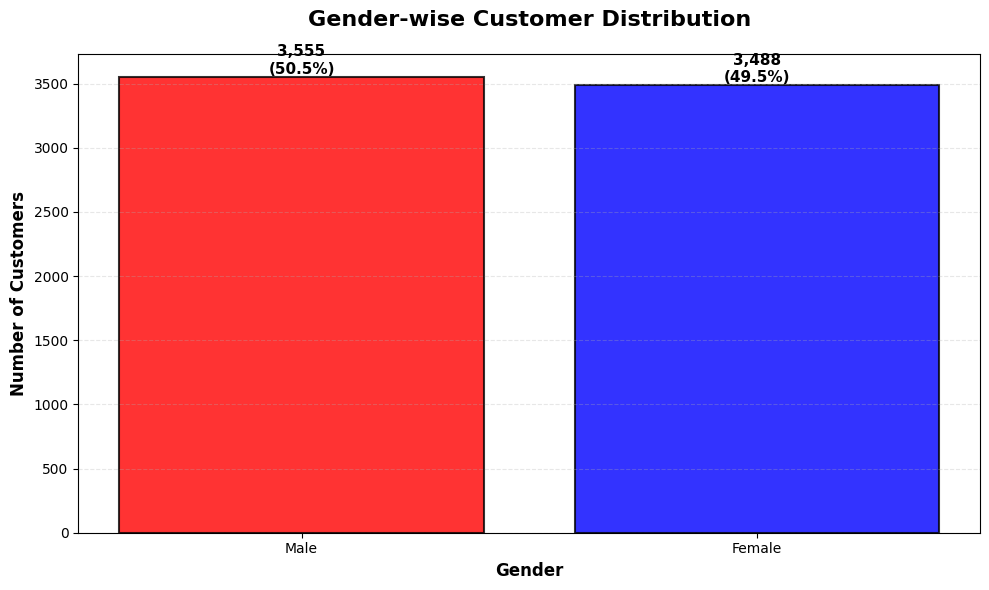

In [371]:
gender_counts = df['gender'].value_counts()
create_bar_chart(gender_counts, 'Gender-wise Customer Distribution', 'Gender',
                'Number of Customers', '01_gender_distribution.png', ['red', 'blue'])

print(f" • Male: {gender_counts['Male']:,} (50.5%) | Female: {gender_counts['Female']:,} (49.5%)")
print(" BUSINESS: Nearly equal distribution - no gender bias in service adoption")

` Senoir Citizen vs non senior Distrbution`

 INSIGHTS:
  • Non-Senior: 5,901 (83.8%) | Senior: 1,142 (16.2%)
 BUSINESS: Seniors are a smaller segment - may face technology barriers


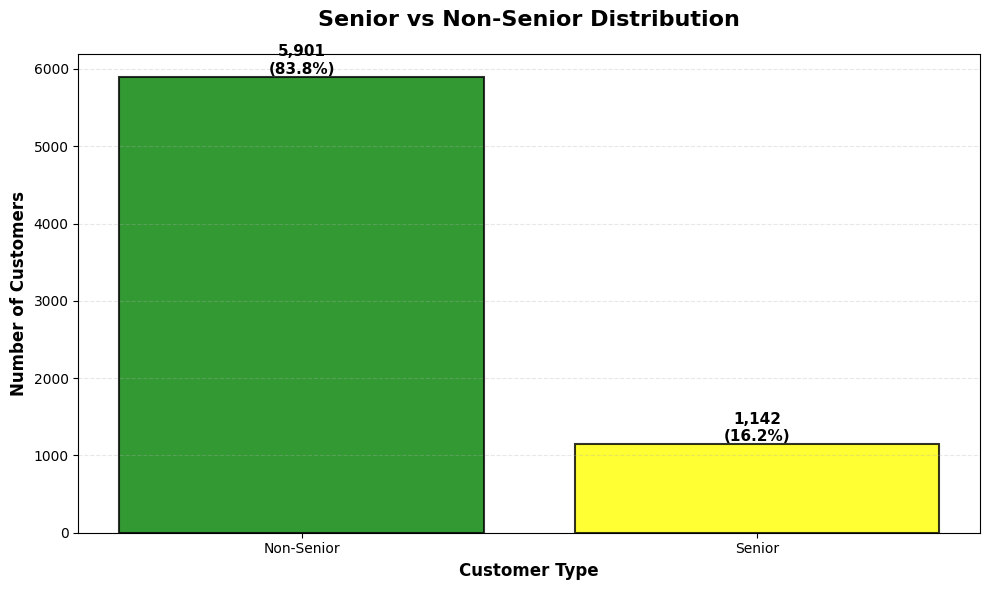

In [372]:
senior_counts = df['SeniorCitizen'].value_counts().sort_index()
senior_data = pd.Series({'Non-Senior': senior_counts[0], 'Senior': senior_counts[1]})
create_bar_chart(senior_data, 'Senior vs Non-Senior Distribution', 'Customer Type',
                'Number of Customers', '02_senior_distribution.png', ['green', 'yellow'])

print(" INSIGHTS:")
print(f"  • Non-Senior: {senior_counts[0]:,} (83.8%) | Senior: {senior_counts[1]:,} (16.2%)")
print(" BUSINESS: Seniors are a smaller segment - may face technology barriers")

` Tenure Group Distribution`

 INSIGHTS:
   • 0-12 months: 2,186 (highest - new customers)
   • 61-72 months: 1,407 (loyal long-term customers)
 BUSINESS: Early-stage churn is high - first year is critical


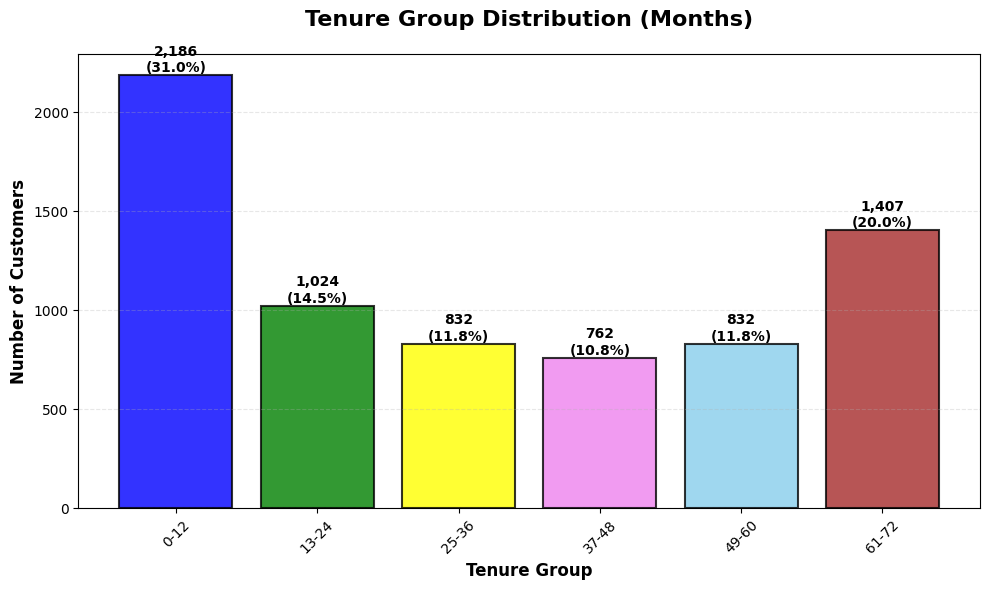

In [373]:
tenure_counts = df['TenureGroup'].value_counts().sort_index()
colors_tenure = ['blue', 'green', 'yellow', 'violet', 'skyblue', 'brown']
create_bar_chart(tenure_counts, 'Tenure Group Distribution (Months)', 'Tenure Group',
                'Number of Customers', '03_tenure_distribution.png', colors_tenure)

print(" INSIGHTS:")
print(f"   • 0-12 months: {tenure_counts['0-12']:,} (highest - new customers)")
print(f"   • 61-72 months: {tenure_counts['61-72']:,} (loyal long-term customers)")
print(" BUSINESS: Early-stage churn is high - first year is critical")

`Sim Provier uage  Distribution`

 INSIGHTS:
   • jio: 1,889 | Airtel: 1,740
   • Vi: 1,712 | BSNL: 1,702
 BUSINESS: Balanced market - highly competitive telecom industry


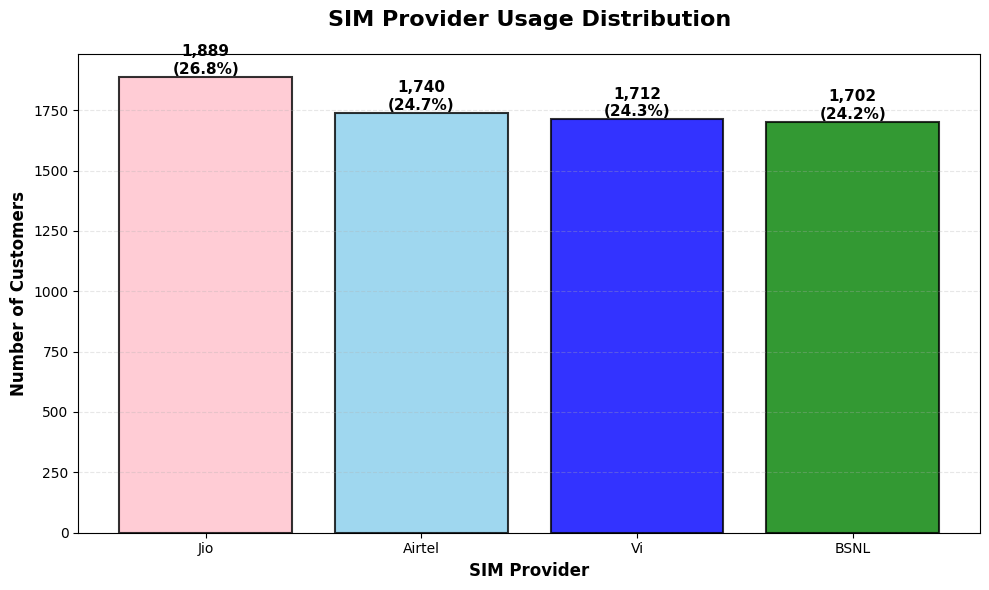

In [374]:
provider_counts = df['SIMProvider'].value_counts()
create_bar_chart(provider_counts, 'SIM Provider Usage Distribution', 'SIM Provider',
                'Number of Customers', '04_sim_provider_distribution.png',
                ['pink', 'skyblue', 'blue', 'green'])

print(" INSIGHTS:")
print(f"   • jio: {provider_counts['Jio']:,} | Airtel: {provider_counts['Airtel']:,}")
print(f"   • Vi: {provider_counts['Vi']:,} | BSNL: {provider_counts['BSNL']:,}")
print(" BUSINESS: Balanced market - highly competitive telecom industry")

` Sim Provider vs Gender `

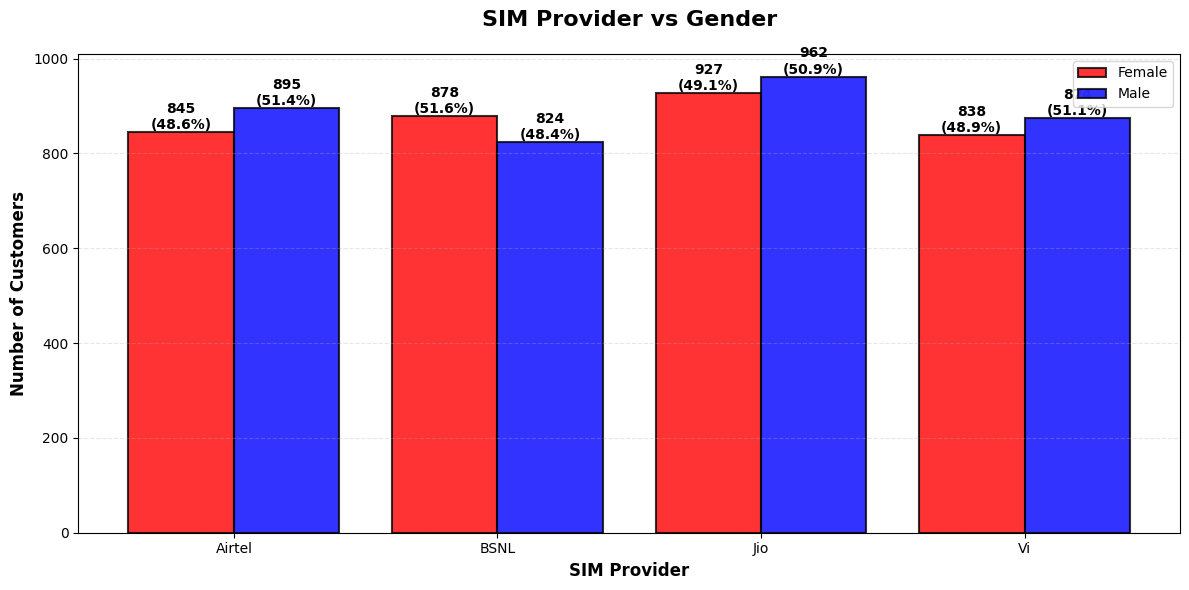

 INSIGHTS:
   • Gender distribution is balanced across all providers
 BUSINESS: No gender bias in provider selection


In [375]:
provider_gender = pd.crosstab(df['SIMProvider'], df['gender'])
create_grouped_bar_chart(provider_gender, 'SIM Provider vs Gender', 'SIM Provider',
                        'Number of Customers', '05_sim_provider_vs_gender.png')

print(" INSIGHTS:")
print("   • Gender distribution is balanced across all providers")
print(" BUSINESS: No gender bias in provider selection")

` Internet service usage Distribution`

 INSIGHTS:
   • Fiber optic: 3,096 (most popular)
   • DSL: 2,421 | No internet: 1,526
 BUSINESS: High demand for high-speed internet


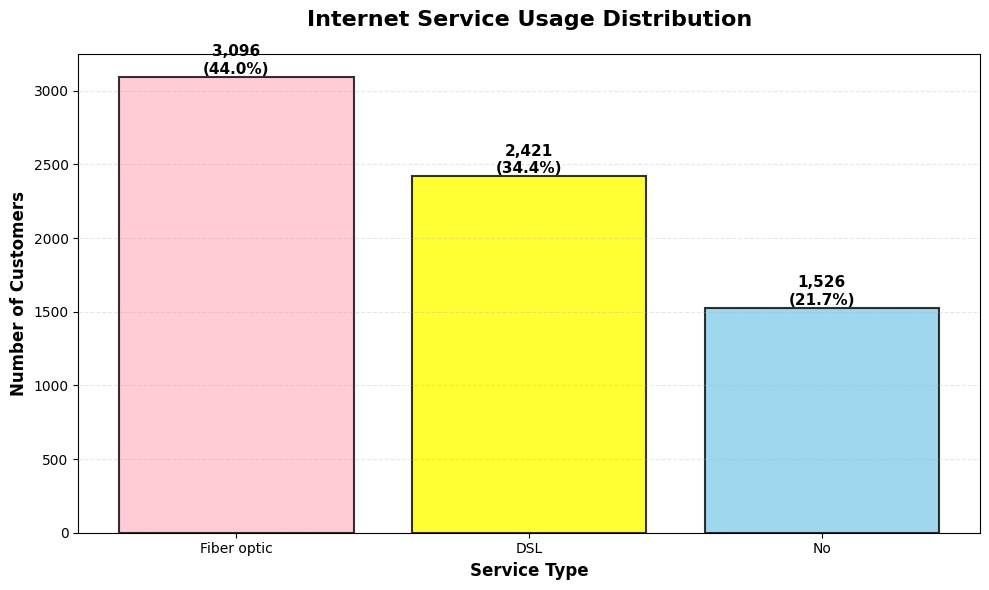

In [376]:

internet_counts = df['InternetService'].value_counts()
create_bar_chart(internet_counts, 'Internet Service Usage Distribution', 'Service Type',
                'Number of Customers', '06_internet_distribution.png',
                ['pink', 'yellow', 'skyblue'])

print(" INSIGHTS:")
print(f"   • Fiber optic: {internet_counts['Fiber optic']:,} (most popular)")
print(f"   • DSL: {internet_counts['DSL']:,} | No internet: {internet_counts['No']:,}")
print(" BUSINESS: High demand for high-speed internet")

` 7.Internet Service vs Churn`

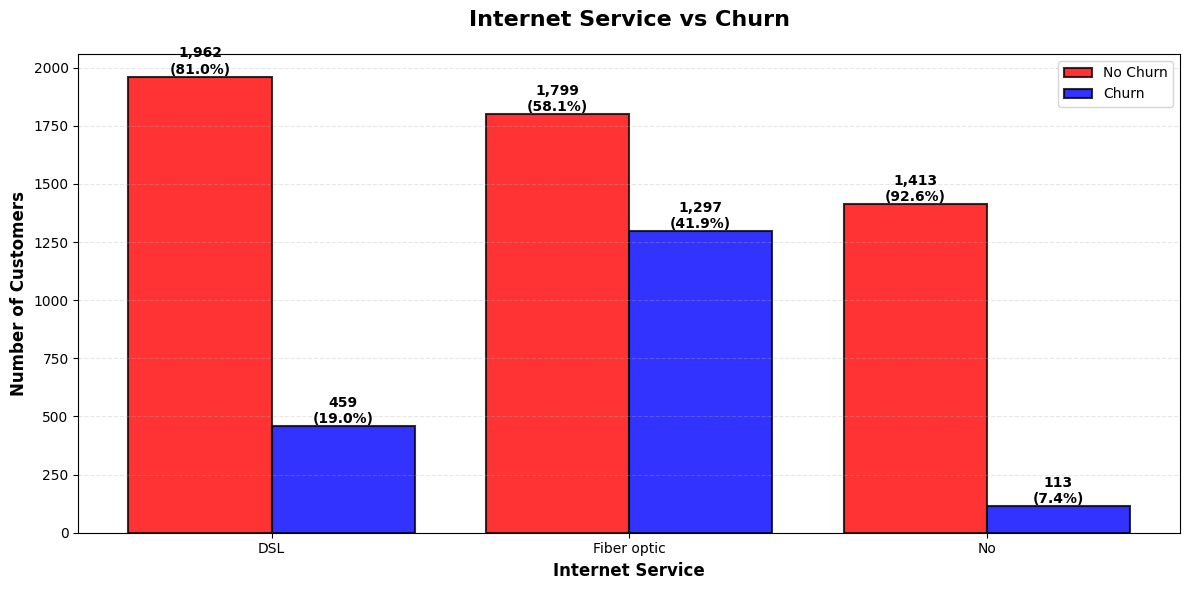

   • DSL: 459/2,421 churned (19.0%)
   • Fiber optic: 1,297/3,096 churned (41.9%)
   • No: 113/1,526 churned (7.4%)
 BUSINESS: Fiber optic has highest churn - service quality issue


In [377]:
internet_churn = pd.crosstab(df['InternetService'], df['Churn'])
create_grouped_bar_chart(internet_churn, 'Internet Service vs Churn', 'Internet Service',
                        'Number of Customers', '07_internet_vs_churn.png',
                        ['No Churn', 'Churn'])

# Calculate churn rates
for service in internet_churn.index:
    total = internet_churn.loc[service].sum()
    churned = internet_churn.loc[service, 'Yes']
    print(f"   • {service}: {churned:,}/{total:,} churned ({churned/total*100:.1f}%)")
print(" BUSINESS: Fiber optic has highest churn - service quality issue")

`8.Contract Type Distribution`

 INSIGHTS:
   • Month-to-month: 3,875 (55% - high risk)
 BUSINESS: Most customers prefer flexibility - churn risk


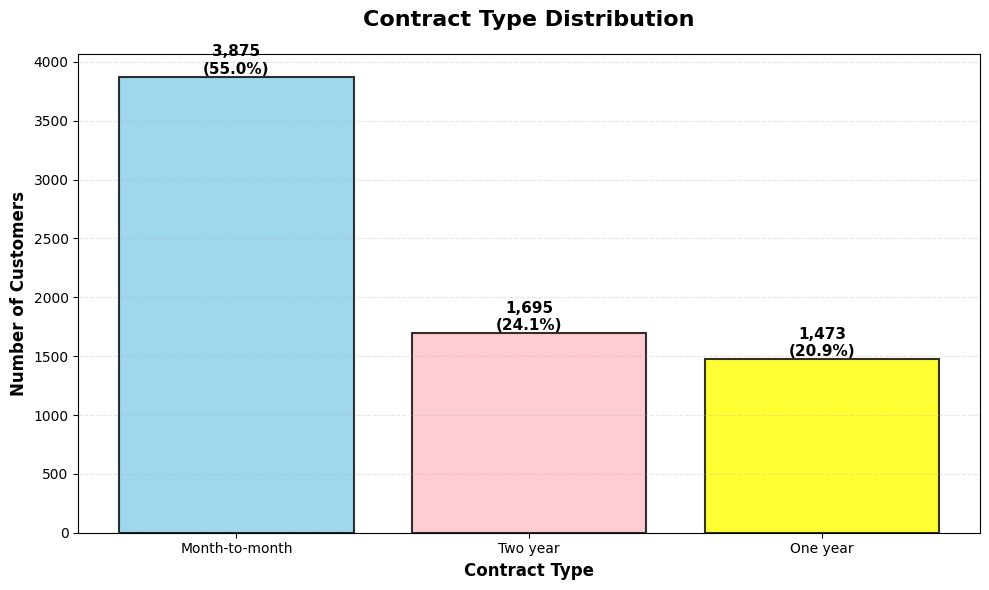

In [378]:
contract_counts = df['Contract'].value_counts()
create_bar_chart(contract_counts, 'Contract Type Distribution', 'Contract Type',
                'Number of Customers', '08_contract_distribution.png',
                ['skyblue', 'pink', 'yellow'])

print(" INSIGHTS:")
print(f"   • Month-to-month: {contract_counts['Month-to-month']:,} (55% - high risk)")
print(" BUSINESS: Most customers prefer flexibility - churn risk")

` 9.Sim Provider Vs Contract`

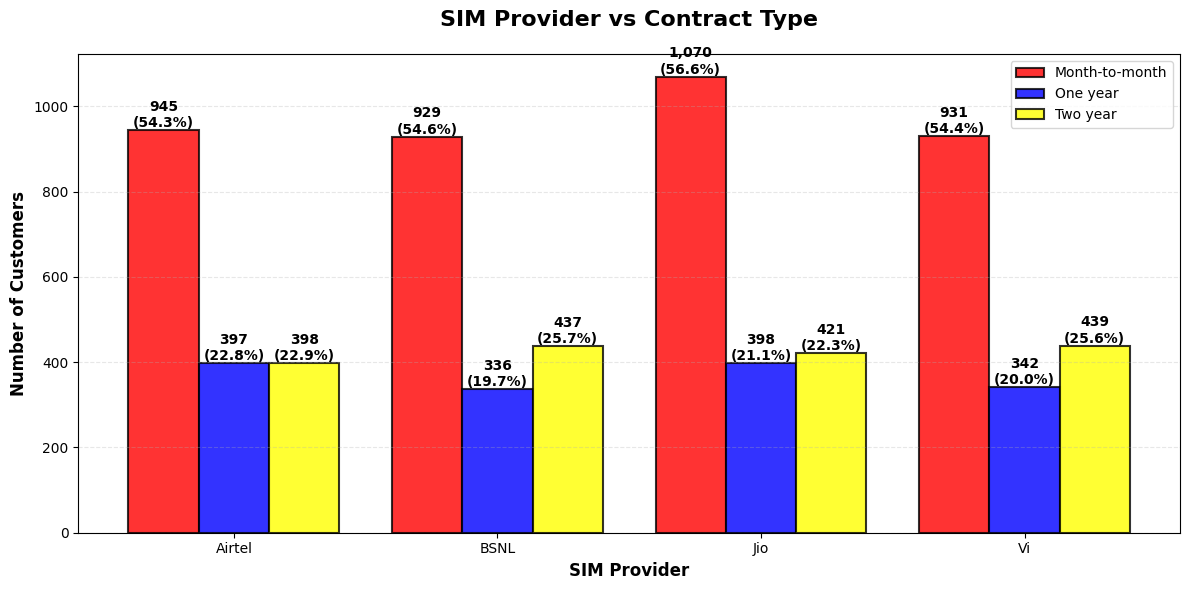

 INSIGHTS:
   • Month-to-month dominates across all providers
 BUSINESS: Opportunity to incentivize long-term contracts


In [379]:
provider_contract = pd.crosstab(df['SIMProvider'], df['Contract'])
create_grouped_bar_chart(provider_contract, 'SIM Provider vs Contract Type', 'SIM Provider',
                        'Number of Customers', '09_provider_vs_contract.png')

print(" INSIGHTS:")
print("   • Month-to-month dominates across all providers")
print(" BUSINESS: Opportunity to incentivize long-term contracts")

` 10.Sim Provider VS Payment Method `

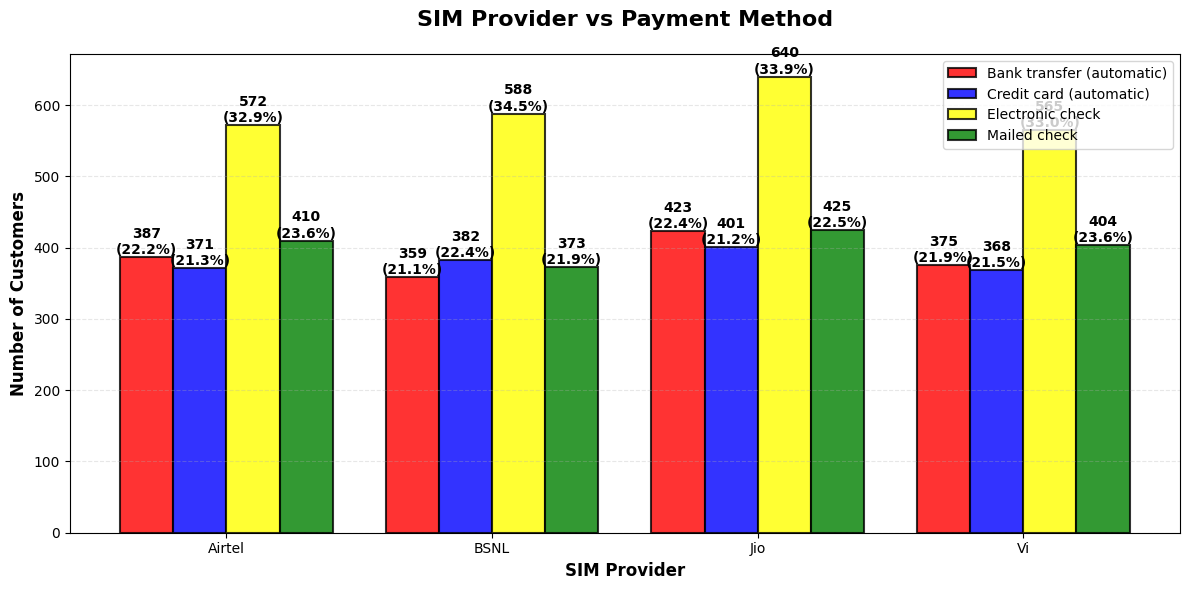

 INSIGHTS:
   • Electronic check is most common across all providers
 BUSINESS: Opportunity for auto-pay incentives


In [380]:
provider_payment = pd.crosstab(df['SIMProvider'], df['PaymentMethod'])
create_grouped_bar_chart(provider_payment, 'SIM Provider vs Payment Method', 'SIM Provider',
                        'Number of Customers', '10_provider_vs_payment.png')

print(" INSIGHTS:")
print("   • Electronic check is most common across all providers")
print(" BUSINESS: Opportunity for auto-pay incentives")

`11.Gender VS Dependents `

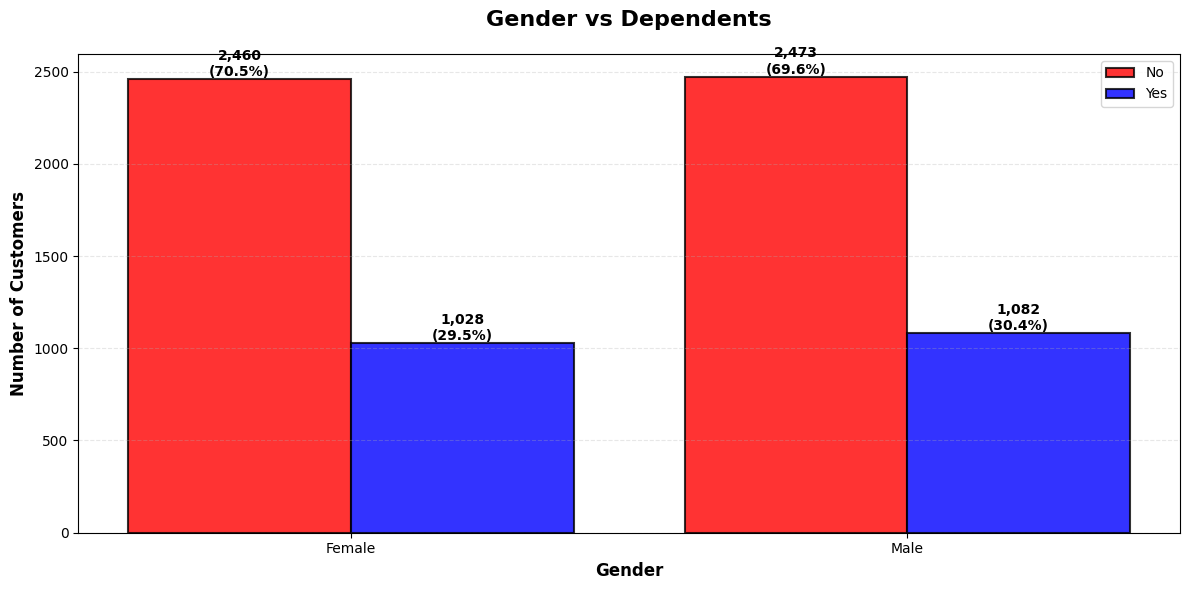

 INSIGHTS:
   • Most customers (both genders) have no dependents
 BUSINESS: Individual users dominate, not families


In [381]:
gender_dependents = pd.crosstab(df['gender'], df['Dependents'])
create_grouped_bar_chart(gender_dependents, 'Gender vs Dependents', 'Gender',
                        'Number of Customers', '11_gender_vs_dependents.png')

print(" INSIGHTS:")
print("   • Most customers (both genders) have no dependents")
print(" BUSINESS: Individual users dominate, not families")

` Contract VS Gender `

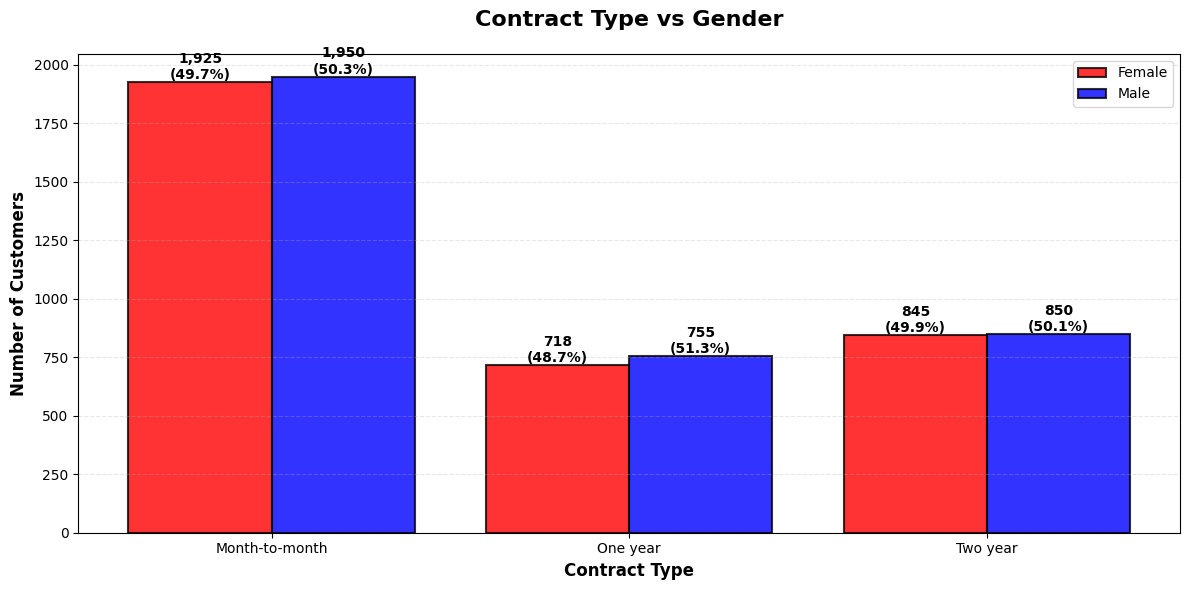

 INSIGHTS:
   • Contract preference is gender-neutral
 BUSINESS: Flexibility drives choice, not gender


In [382]:
contract_gender = pd.crosstab(df['Contract'], df['gender'])
create_grouped_bar_chart(contract_gender, 'Contract Type vs Gender', 'Contract Type',
                        'Number of Customers', '12_contract_vs_gender.png')

print(" INSIGHTS:")
print("   • Contract preference is gender-neutral")
print(" BUSINESS: Flexibility drives choice, not gender")

` 13. Contract VS Senior Citizen`

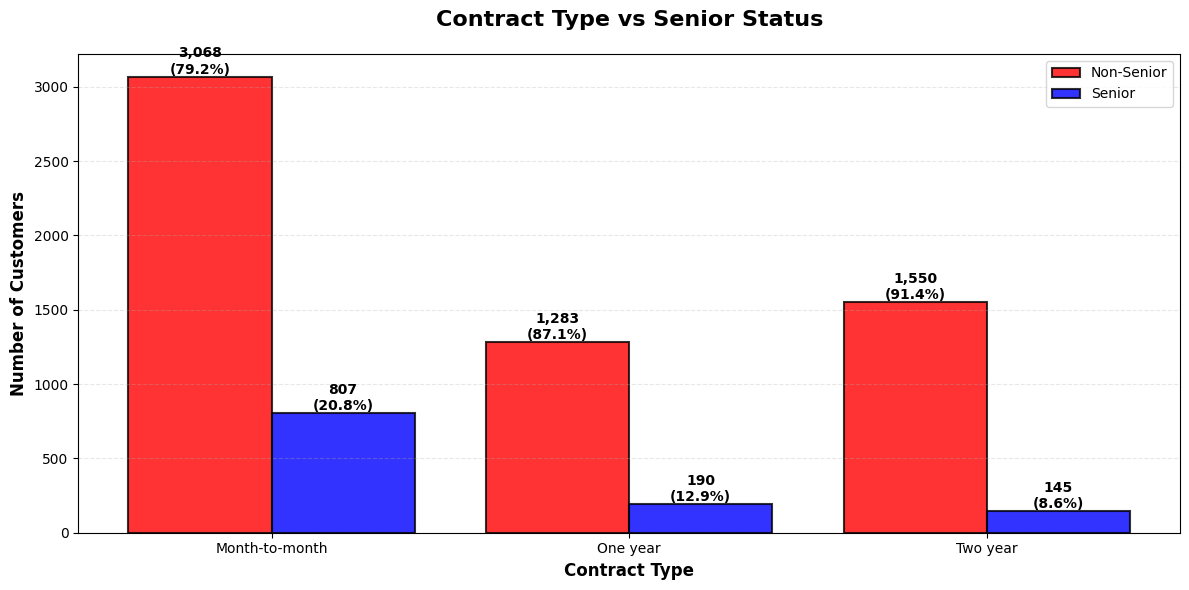

 INSIGHTS:
   • Seniors strongly prefer month-to-month (flexibility)
 BUSINESS: Seniors value flexibility over commitment


In [383]:
contract_senior = pd.crosstab(df['Contract'], df['SeniorCitizen'])
contract_senior.columns = ['Non-Senior', 'Senior']
create_grouped_bar_chart(contract_senior, 'Contract Type vs Senior Status', 'Contract Type',
                        'Number of Customers', '13_contract_vs_senior.png')

print(" INSIGHTS:")
print("   • Seniors strongly prefer month-to-month (flexibility)")
print(" BUSINESS: Seniors value flexibility over commitment")

`14. Churn VS Multiple Lines`

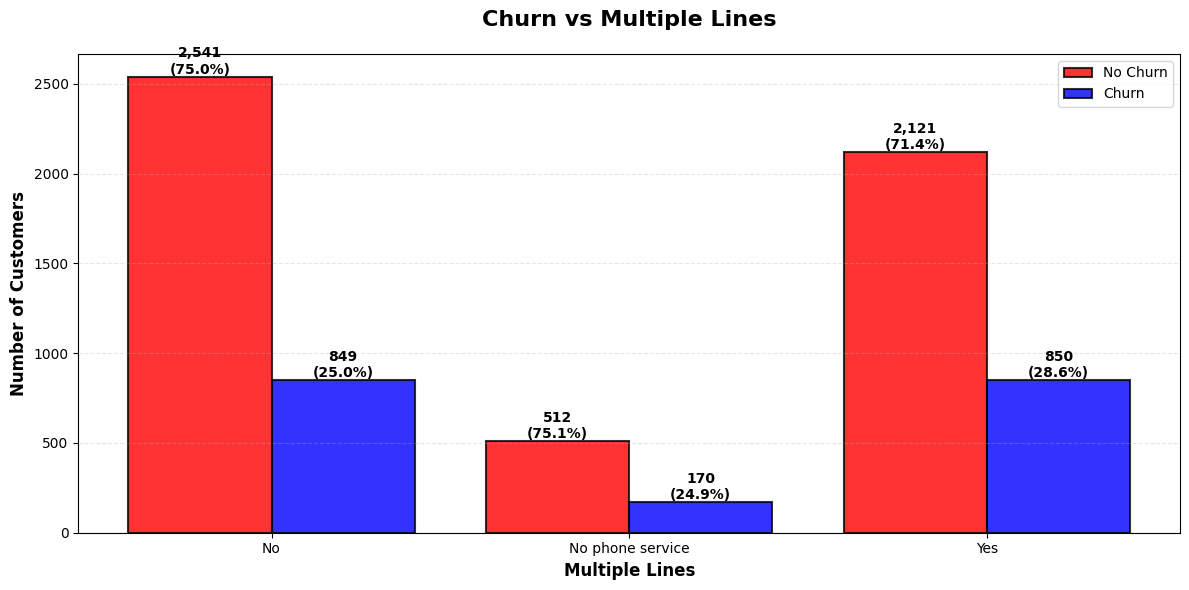

 INSIGHTS:
   • Multiple line users show similar churn to single line
 BUSINESS: Line complexity may not significantly impact churn


In [384]:
churn_lines = pd.crosstab(df['MultipleLines'], df['Churn'])
create_grouped_bar_chart(churn_lines, 'Churn vs Multiple Lines', 'Multiple Lines',
                        'Number of Customers', '14_churn_vs_multilines.png',
                        ['No Churn', 'Churn'])

print(" INSIGHTS:")
print("   • Multiple line users show similar churn to single line")
print(" BUSINESS: Line complexity may not significantly impact churn")

`15. Churn Vs Online Security`

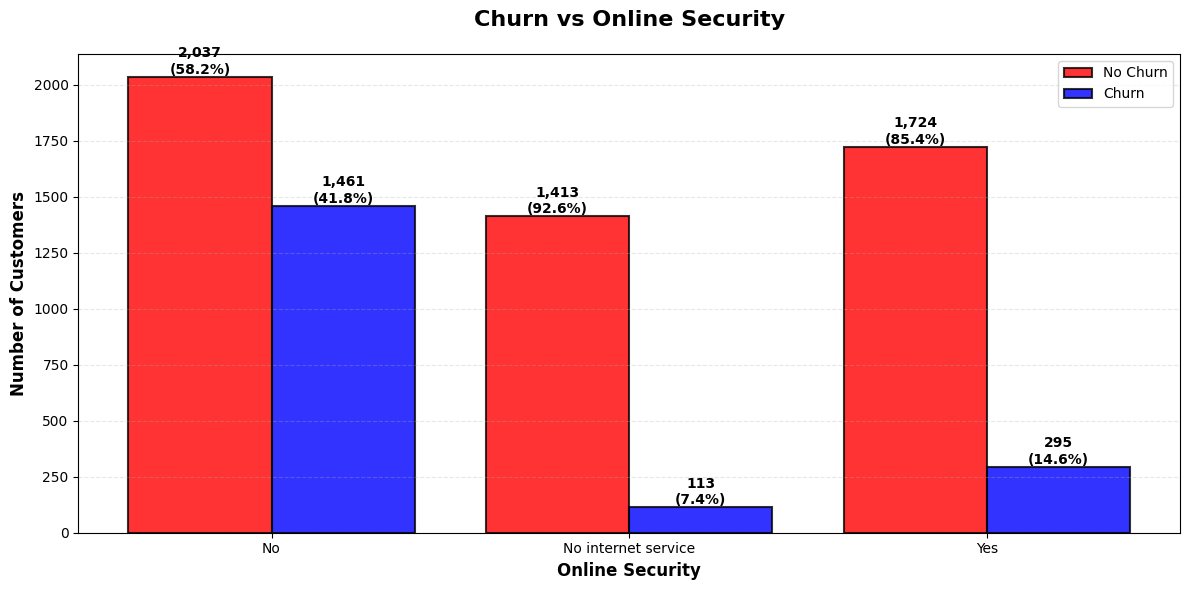

   • No: 41.8% churn rate
   • No internet service: 7.4% churn rate
   • Yes: 14.6% churn rate
 BUSINESS: Online security reduces churn significantly


In [385]:
churn_security = pd.crosstab(df['OnlineSecurity'], df['Churn'])
create_grouped_bar_chart(churn_security, 'Churn vs Online Security', 'Online Security',
                        'Number of Customers', '15_churn_vs_security.png',
                        ['No Churn', 'Churn'])

for sec in churn_security.index:
    total = churn_security.loc[sec].sum()
    churned = churn_security.loc[sec, 'Yes']
    print(f"   • {sec}: {churned/total*100:.1f}% churn rate")
print(" BUSINESS: Online security reduces churn significantly")

` 16.Churn VS Phone Service `

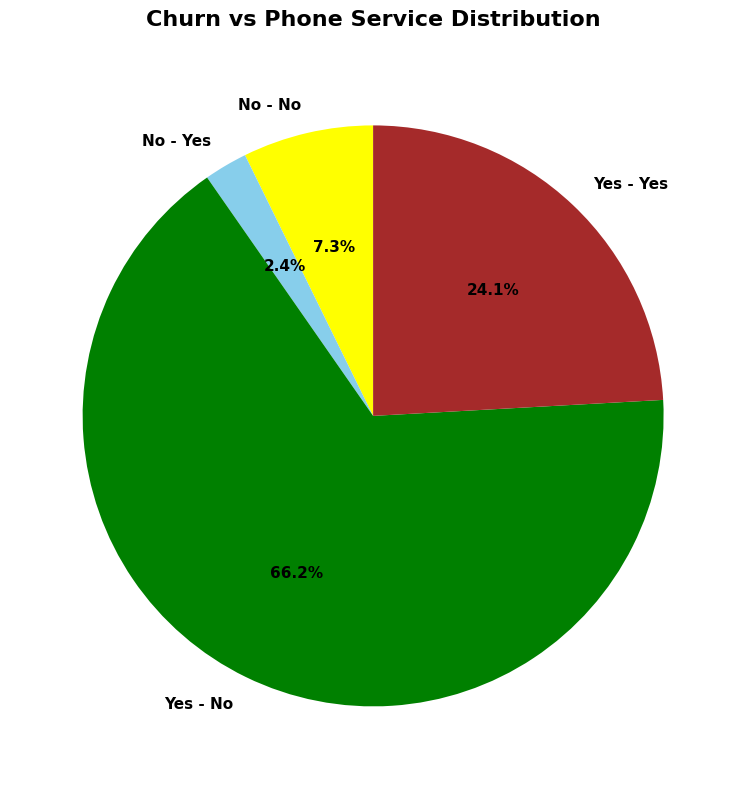

 INSIGHTS:
   • Phone service users: 6,361
 BUSINESS: Phone service users form majority but also churn more


In [386]:
phone_churn = df.groupby(['PhoneService', 'Churn']).size()
labels = [f'{ps} - {ch}' for ps, ch in phone_churn.index]
sizes = phone_churn.values
colors = ['yellow', 'skyblue', 'green', 'brown']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90,
        textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Churn vs Phone Service Distribution', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('16_churn_vs_phone_pie.png', dpi=300, bbox_inches='tight')
plt.show()

print(" INSIGHTS:")
print(f"   • Phone service users: {df[df['PhoneService']=='Yes'].shape[0]:,}")
print(" BUSINESS: Phone service users form majority but also churn more")

`17. Internet service Vs Gender`

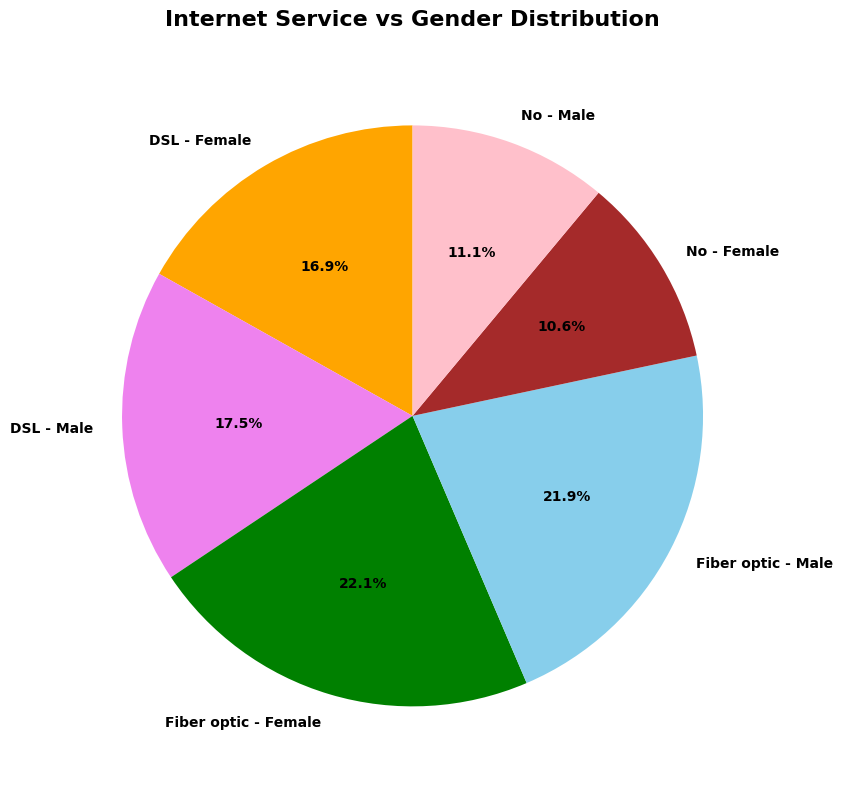

 INSIGHTS:
   • Internet adoption is gender-neutral
 BUSINESS: Both genders prefer fiber optic equally


In [387]:
internet_gender = df.groupby(['InternetService', 'gender']).size()
labels = [f'{inet} - {gen}' for inet, gen in internet_gender.index]
sizes = internet_gender.values
colors = ['orange', 'violet', 'green', 'skyblue', 'brown', 'pink']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90,
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Internet Service vs Gender Distribution', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('17_internet_vs_gender_pie.png', dpi=300, bbox_inches='tight')
plt.show()

print(" INSIGHTS:")
print("   • Internet adoption is gender-neutral")
print(" BUSINESS: Both genders prefer fiber optic equally")

` 18.Internet Service Vs Payment Method `

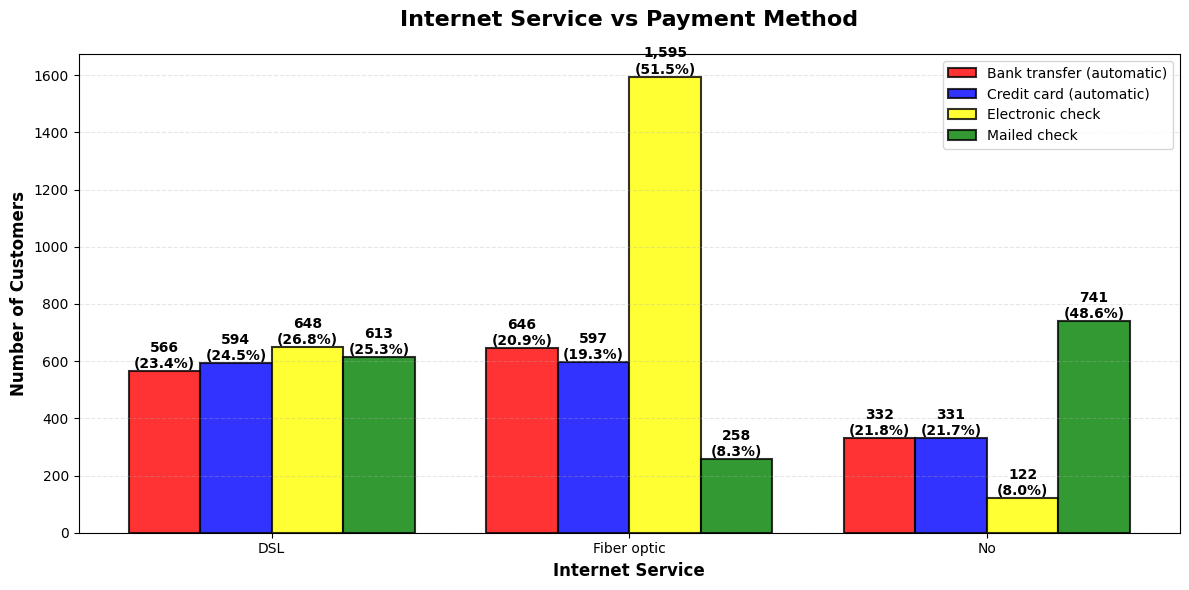

 INSIGHTS:
   • Electronic check dominates across all internet services
 BUSINESS: Digital payment adoption opportunity


In [388]:
internet_payment = pd.crosstab(df['InternetService'], df['PaymentMethod'])
create_grouped_bar_chart(internet_payment, 'Internet Service vs Payment Method', 'Internet Service',
                        'Number of Customers', '18_internet_vs_payment.png')

print(" INSIGHTS:")
print("   • Electronic check dominates across all internet services")
print(" BUSINESS: Digital payment adoption opportunity")

`Internet Service Vs Contract `

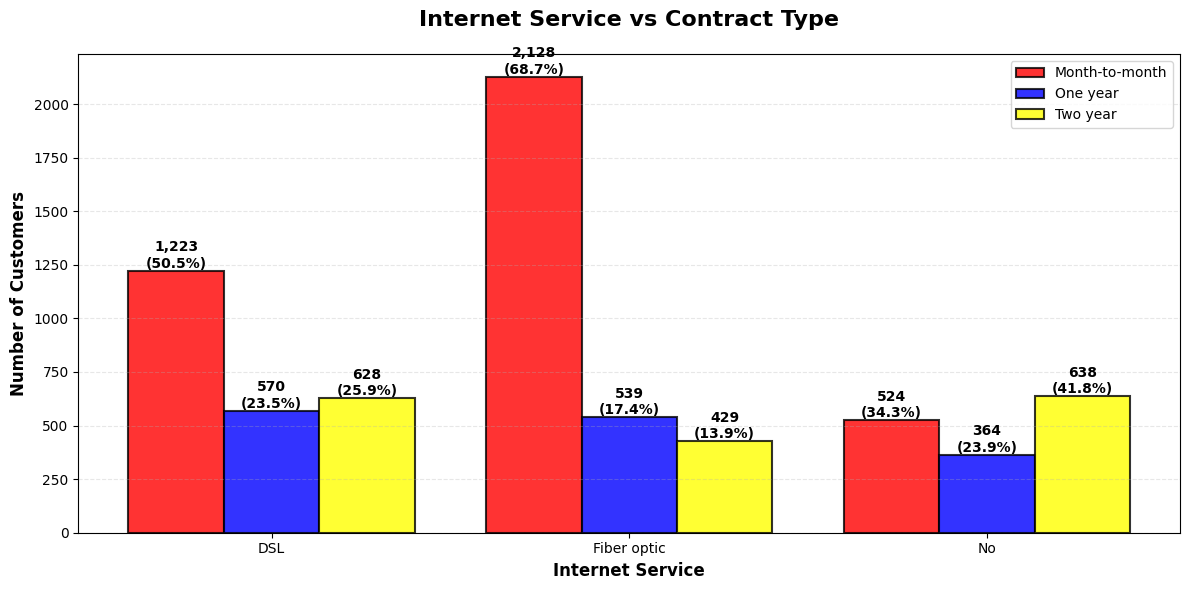

 INSIGHTS:
   • Fiber users prefer month-to-month (flexibility)
 BUSINESS: Advanced service users want flexibility


In [389]:
internet_contract = pd.crosstab(df['InternetService'], df['Contract'])
create_grouped_bar_chart(internet_contract, 'Internet Service vs Contract Type', 'Internet Service',
                        'Number of Customers', '19_internet_vs_contract.png')

print(" INSIGHTS:")
print("   • Fiber users prefer month-to-month (flexibility)")
print(" BUSINESS: Advanced service users want flexibility")

` 20.Internet Service Vs senior Citizen`

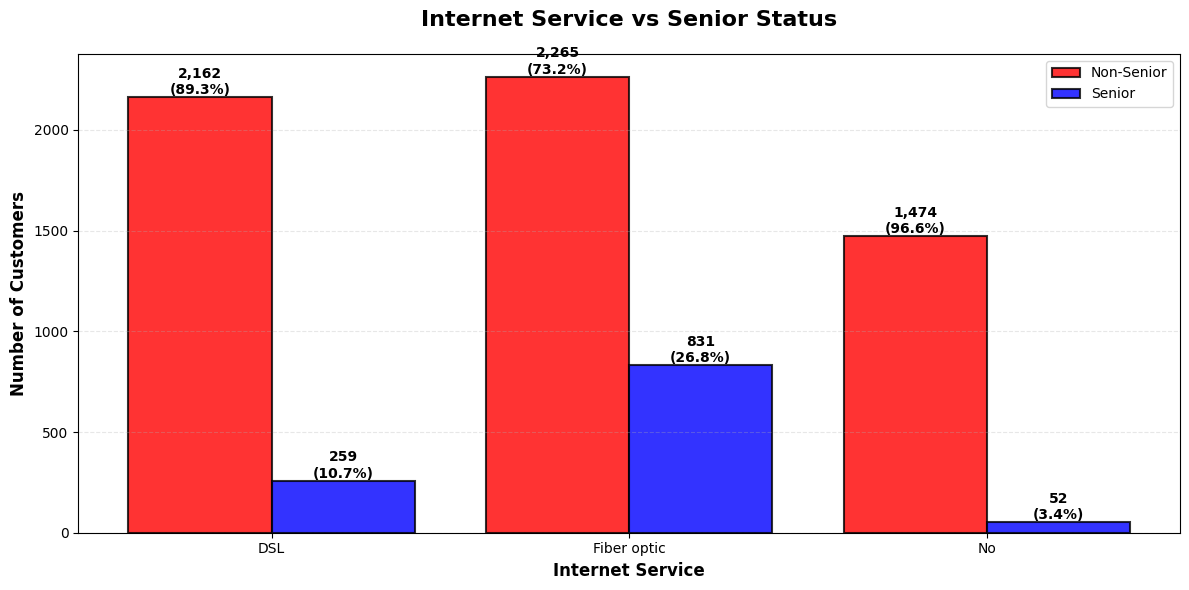

 INSIGHTS:
   • Seniors who adopt internet prefer fiber optic
 BUSINESS: Senior-friendly internet plans needed


In [390]:
internet_senior = pd.crosstab(df['InternetService'], df['SeniorCitizen'])
internet_senior.columns = ['Non-Senior', 'Senior']
create_grouped_bar_chart(internet_senior, 'Internet Service vs Senior Status', 'Internet Service',
                        'Number of Customers', '20_internet_vs_senior.png')

print(" INSIGHTS:")
print("   • Seniors who adopt internet prefer fiber optic")
print(" BUSINESS: Senior-friendly internet plans needed")

`21. Customer Distribution by Tenure(Quater-Wise)`

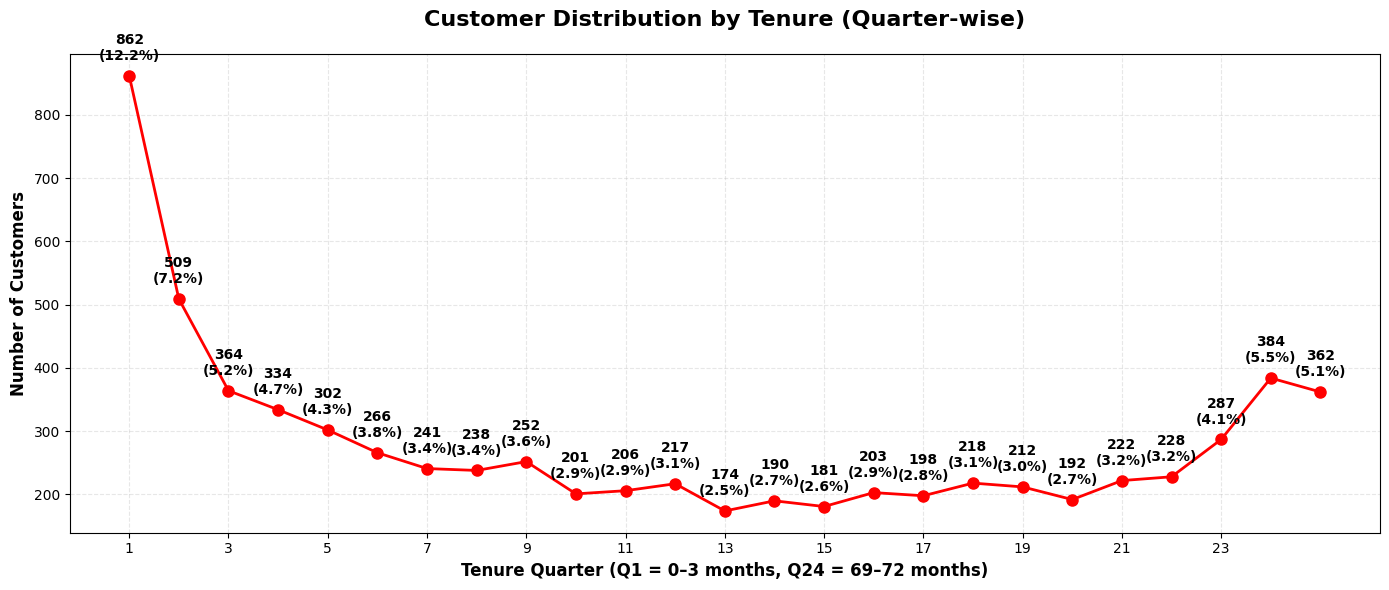

 INSIGHTS:
   • Q1 has highest customers (862) - many new signups
   • Sharp decline in early quarters - early churn pattern
 BUSINESS: First quarters are critical - focus retention here


In [391]:
# Count customers per tenure quarter
quarter_counts = df['TenureQuarter'].value_counts().sort_index()
total_customers = quarter_counts.sum()

# Plot setup
plt.figure(figsize=(14, 6))
plt.plot(quarter_counts.index, quarter_counts.values, marker='o', linewidth=2,
         markersize=8, color='red')

# Add value + percentage labels
for i, (quarter, count) in enumerate(quarter_counts.items()):
    percent = (count / total_customers) * 100
    label = f"{int(count):,}\n({percent:.1f}%)"
    plt.text(quarter, count + 20, label, ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='black')

# Styling
plt.title('Customer Distribution by Tenure (Quarter-wise)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tenure Quarter (Q1 = 0–3 months, Q24 = 69–72 months)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(range(1, 25, 2))
plt.tight_layout()
plt.savefig('21_tenure_quarterly.png', dpi=300, bbox_inches='tight')
plt.show()

# Insights
print(" INSIGHTS:")
print(f"   • Q1 has highest customers ({quarter_counts[1]:,}) - many new signups")
print(f"   • Sharp decline in early quarters - early churn pattern")
print(" BUSINESS: First quarters are critical - focus retention here")


` 22.Internet service VS Churn By Gender & Senior `

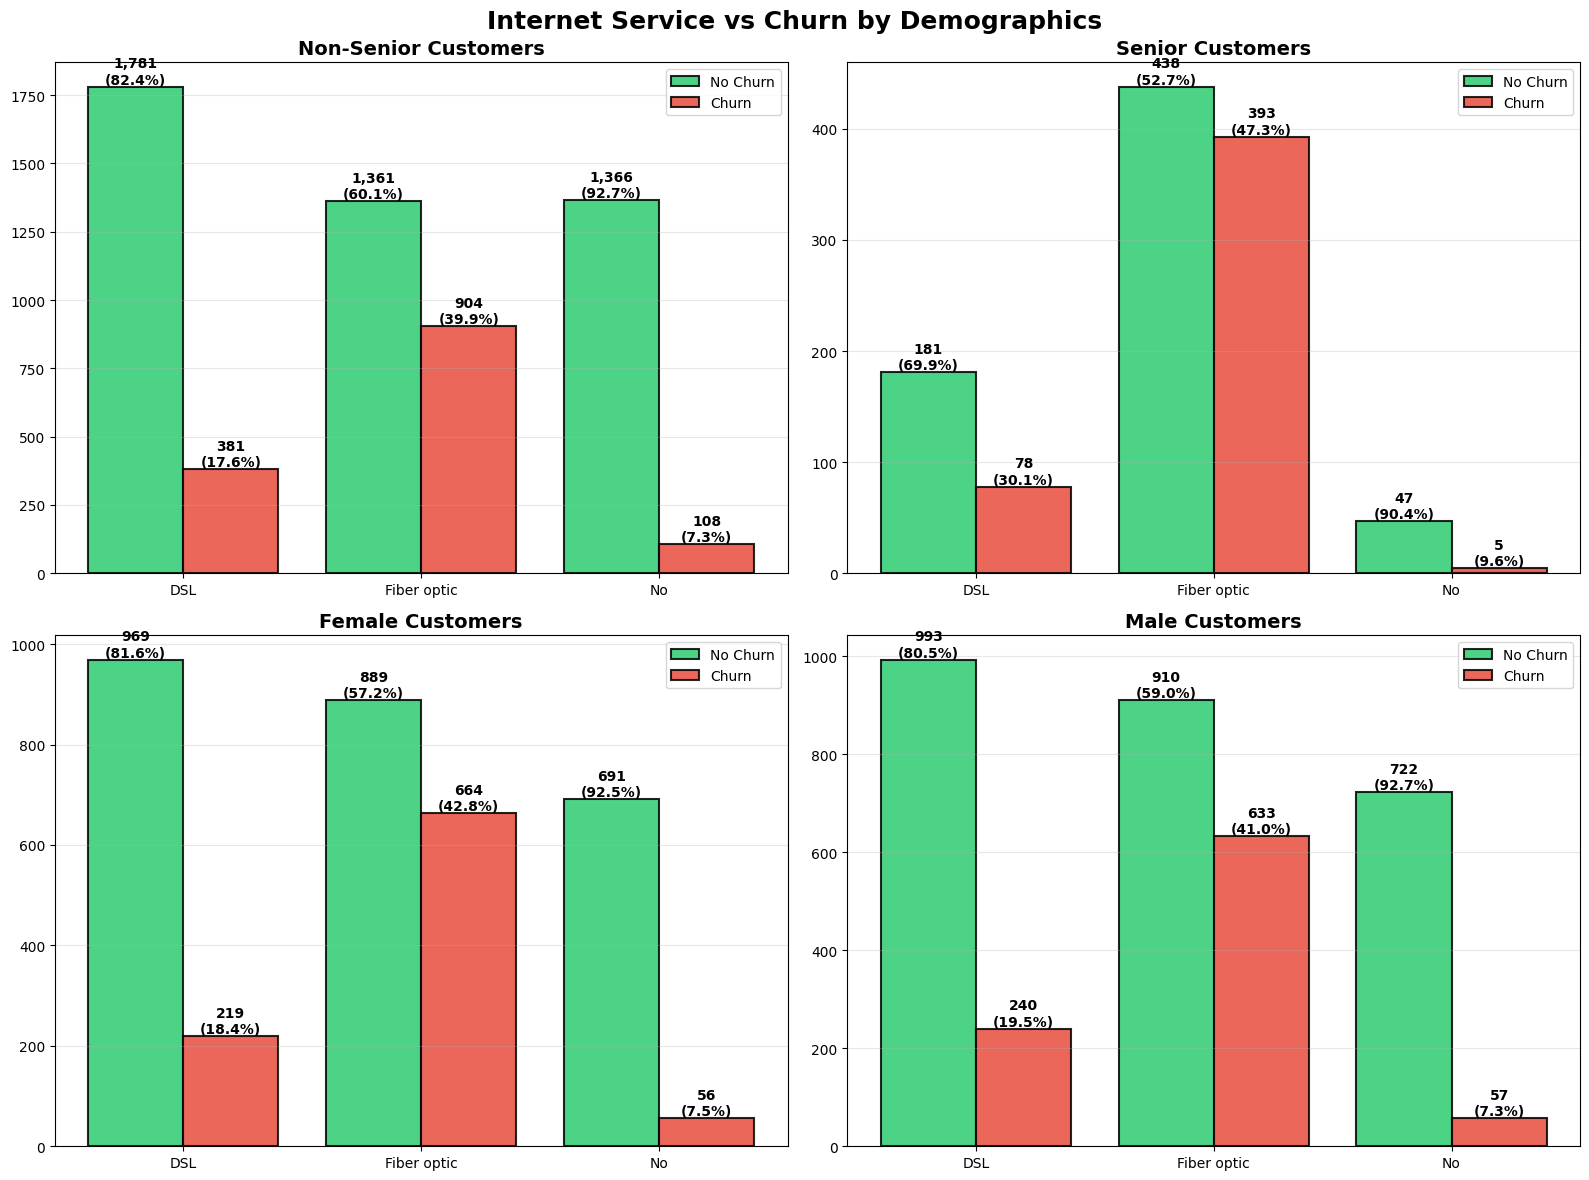

In [392]:
# First, createing the 'SeniorLabel' column
df['SeniorLabel'] = df['SeniorCitizen'].map({0: 'Non-Senior', 1: 'Senior'})

# Replicating the logic of create_demographic_churn_grid directly within the cell
# to handle mixed demographic types for the 2x2 grid

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Internet Service vs Churn by Demographics', fontsize=18, fontweight='bold')

colors = {'No': '#2ecc71', 'Yes': '#e74c3c'}

demographic_segments = [
    {'col': 'SeniorLabel', 'value': 'Non-Senior', 'title': 'Non-Senior Customers'},
    {'col': 'SeniorLabel', 'value': 'Senior', 'title': 'Senior Customers'},
    {'col': 'gender', 'value': 'Female', 'title': 'Female Customers'},
    {'col': 'gender', 'value': 'Male', 'title': 'Male Customers'}
]

for idx, segment_info in enumerate(demographic_segments):
    row, col = divmod(idx, 2)
    segment_col = segment_info['col']
    segment_value = segment_info['value']
    segment_title = segment_info['title']

    subset = df[df[segment_col] == segment_value]
    crosstab = pd.crosstab(subset['InternetService'], subset['Churn'])
    x = np.arange(len(crosstab.index))
    row_total = crosstab.sum(axis=1)

    for i, churn_status in enumerate(['No', 'Yes']):
        offset = -0.2 if churn_status == 'No' else 0.2
        bars = axes[row, col].bar(x + offset, crosstab[churn_status], 0.4,
                                  label='No Churn' if churn_status == 'No' else 'Churn',
                                  color=colors[churn_status], edgecolor='black', linewidth=1.5, alpha=0.85)

        # Add labels (value + percentage)
        for j, bar in enumerate(bars):
            height = bar.get_height()
            percent = (height / row_total[j] * 100) if row_total[j] > 0 else 0
            label = f"{int(height):,}\n({percent:.1f}%)"
            axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                                label, ha='center', va='bottom', fontsize=10, fontweight='bold')

    axes[row, col].set_title(segment_title, fontsize=14, fontweight='bold')
    axes[row, col].set_xticks(x)
    axes[row, col].set_xticklabels(crosstab.index)
    axes[row, col].legend()
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('22_internet_churn_demographics.png', dpi=300, bbox_inches='tight')
plt.show()

`Churn Vs Streaming TV `

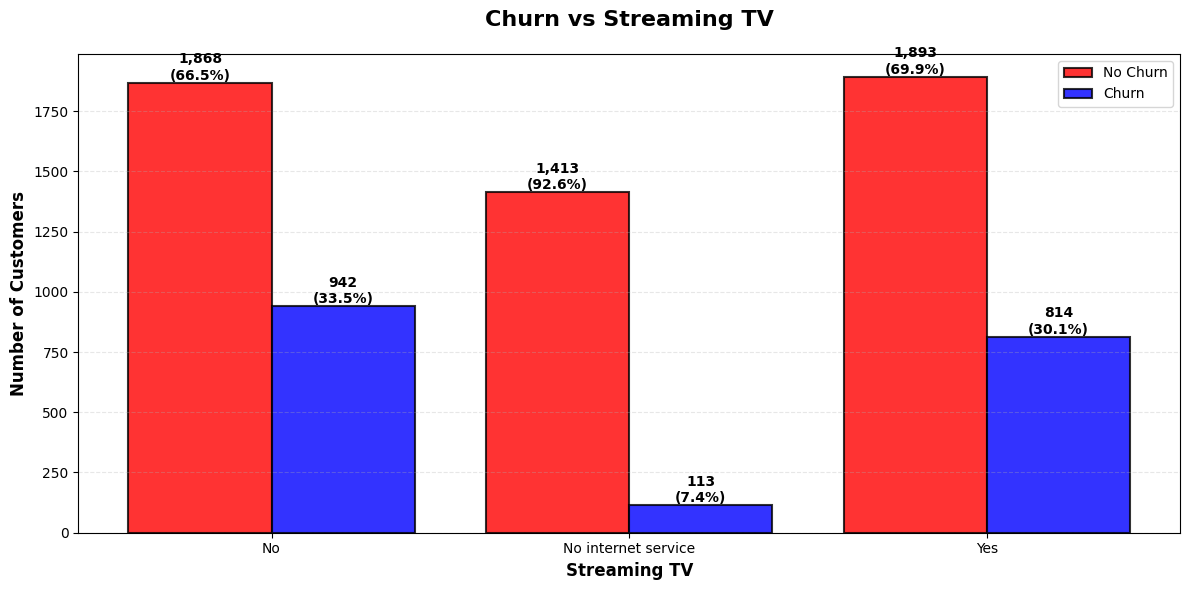

   • No: 33.5% churn rate
   • No internet service: 7.4% churn rate
   • Yes: 30.1% churn rate
 BUSINESS: Streaming TV users are more engaged - lower churn


In [393]:
churn_streaming = pd.crosstab(df['StreamingTV'], df['Churn'])
create_grouped_bar_chart(churn_streaming, 'Churn vs Streaming TV', 'Streaming TV',
                        'Number of Customers', '23_churn_vs_streaming.png',
                        ['No Churn', 'Churn'])

for stream in churn_streaming.index:
    total = churn_streaming.loc[stream].sum()
    churned = churn_streaming.loc[stream, 'Yes']
    print(f"   • {stream}: {churned/total*100:.1f}% churn rate")
print(" BUSINESS: Streaming TV users are more engaged - lower churn")

`24.Internet Switching Customerrs By Gender `

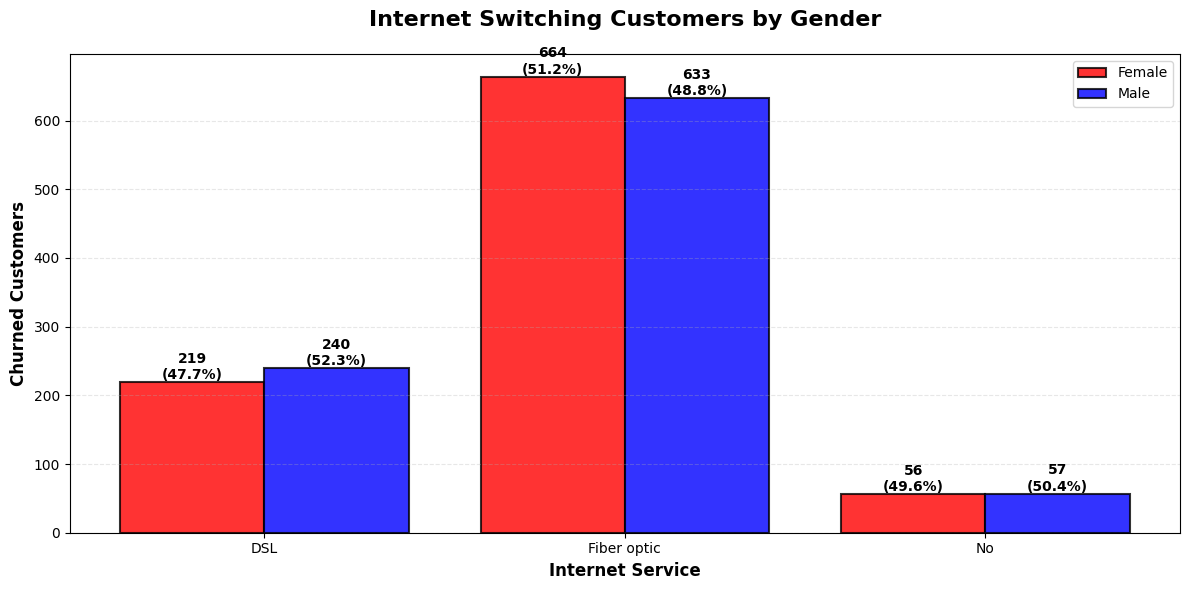

 INSIGHTS:
   • Fiber optic users switch most (both genders)
 BUSINESS: Fiber quality issues drive switching


In [394]:
# Assume "switching" means churned customers with internet
switched = df[df['Churn'] == 'Yes']
switch_gender_internet = pd.crosstab(switched['InternetService'], switched['gender'])

create_grouped_bar_chart(switch_gender_internet, 'Internet Switching Customers by Gender',
                        'Internet Service', 'Churned Customers', '24_switching_by_gender.png')

print(" INSIGHTS:")
print("   • Fiber optic users switch most (both genders)")
print(" BUSINESS: Fiber quality issues drive switching")

`sim Provider Vs Gender & Senior(Percentage)`

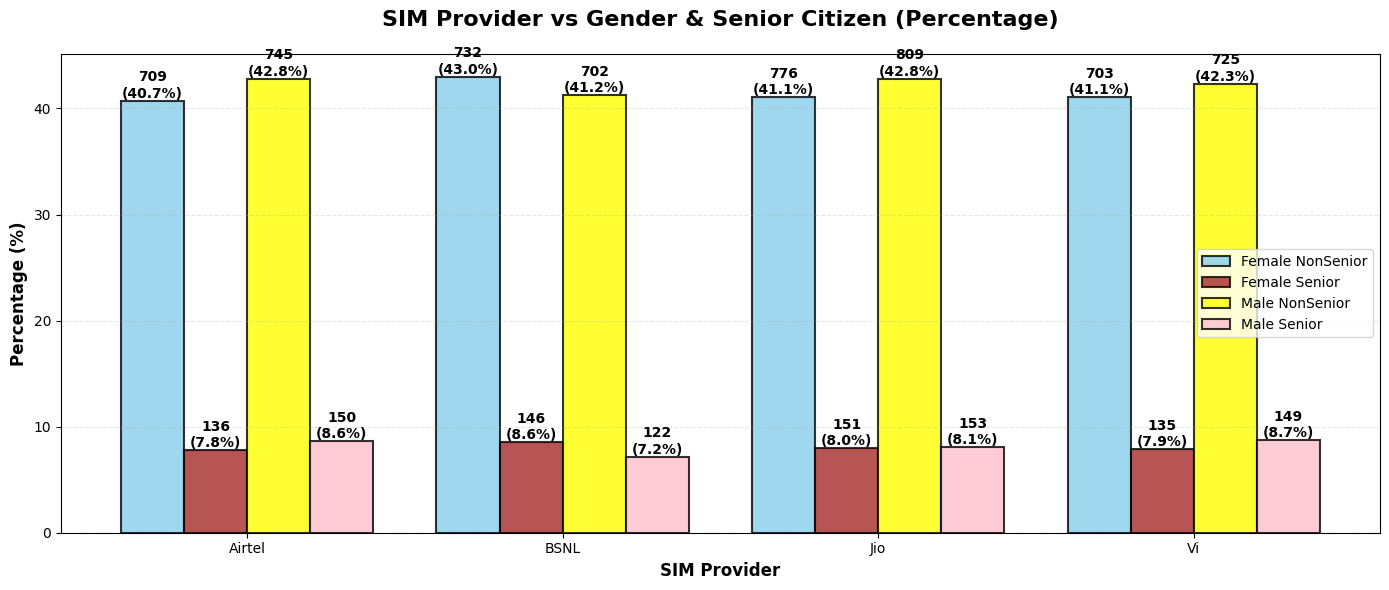

In [395]:
# Create demographic segments
df['Demographic'] = df['gender'] + '_' + df['SeniorCitizen'].map({0: 'NonSenior', 1: 'Senior'})

# Crosstabs
provider_demo_counts = pd.crosstab(df['SIMProvider'], df['Demographic'])
provider_demo_percent = provider_demo_counts.div(provider_demo_counts.sum(axis=1), axis=0) * 100

# Plot setup
fig = plt.figure(figsize=(14, 6))
x = np.arange(len(provider_demo_counts.index))
width = 0.2
demographics = provider_demo_counts.columns
colors = ['skyblue', 'brown', 'yellow', 'pink']

for i, demo in enumerate(demographics):
    offset = i * width - 1.5 * width
    bars = plt.bar(x + offset, provider_demo_percent[demo], width,
                   label=demo.replace('_', ' '), color=colors[i],
                   edgecolor='black', linewidth=1.5, alpha=0.8)

    # Add value + percentage labels
    for j, bar in enumerate(bars):
        height = bar.get_height()
        count = provider_demo_counts.iloc[j, i]
        label = f"{count:,}\n({height:.1f}%)"
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 label, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling
plt.title('SIM Provider vs Gender & Senior Citizen (Percentage)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('SIM Provider', fontsize=12, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold')
plt.xticks(x, provider_demo_counts.index)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('SIM_PROVIDER_VS_GENDER_SENIOR.png', dpi=300, bbox_inches='tight')
plt.show()
